In [1]:
# Standart imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create x (features matrix)
x = heart_disease.drop("target",axis=1)
# create y (labels)
y = heart_disease["target"]


In [4]:
#2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)


# we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [6]:
clf.fit(x_train,y_train);

In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
236,58,1,0,125,300,0,0,171,0,0.0,2,2,3
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [8]:
# make a prediction 
#y_label = clf.predict(np.array([0,2,3,4]))

In [9]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [10]:
y_test

15     1
32     1
275    0
56     1
163    1
      ..
268    0
44     1
0      1
144    1
298    0
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model on training data and test data
clf.score(x_train, y_train)

1.0

In [12]:
clf.score(x_test, y_test)

0.7868852459016393

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.80      0.77      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[24,  6],
       [ 7, 24]])

In [15]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [16]:
# 5. improve a model
#try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 83.61%

Trying model with 20 estimators...
Model accuracy on test set: 80.33%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 81.97%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 75.41%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [17]:
# 6. sve a model and load it
import pickle
pickle.dump(clf, open("random_forest_model1.pkl","wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.819672131147541

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
x = heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
car_sales = pd.read_csv("car-sales-extended.csv")

In [25]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [26]:
# split into x and y
x = car_sales.drop("Price" ,axis = 1)
y = car_sales["Price"]

# split into training and test
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [27]:
#Build ml model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [28]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

caterogical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                caterogical_features)],
                                remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [29]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [30]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]],dtype = int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [32]:
#Lets refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size = 0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
model.score(x_test, y_test)#Wrong dataset used

0.3235867221569877

In [34]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [35]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
x = car_sales_missing.drop(["Price"],axis = 1)
y = car_sales_missing["Price"]

In [37]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

caterogical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                caterogical_features)],
                                remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [38]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the colour column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace = True)

# Fill the doors column
car_sales_missing["Doors"].fillna(4 , inplace = True)

/var/folders/gh/lbkqtpb11q79fy7cxd2_8b0r0000gn/T/ipykernel_49788/2402471357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
/var/folders/gh/lbkqtpb11q79fy7cxd2_8b0r0000gn/T/ipykernel_49788/2402471357.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [39]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [41]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

x = car_sales_missing.drop(["Price"],axis = 1)
y = car_sales_missing["Price"]


caterogical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                caterogical_features)],
                                remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [43]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [46]:
#Split into x , y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [47]:
#fill missing values

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value= 4)
num_imputer = SimpleImputer(strategy="mean")

#define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#create an imputer
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)])

#Transform the data
filled_x_train = imputer.fit_transform(x_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_x_test = imputer.transform(x_test) # tranform takes the imputing missing values from the training set and fills the test set with them

filled_x_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [48]:
car_sales_filled_train = pd.DataFrame(filled_x_train,
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_x_test,
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [49]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train

<760x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3040 stored elements in Compressed Sparse Row format>

In [50]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.09497633411335504

In [51]:
# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [52]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [53]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [54]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
#Import algorithm
from sklearn.linear_model import Ridge
#setup random seed
np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

#split the data

x_train, x_test, y_train, y_test = train_test_split(x,y)

#Instantiate and fit the model
model = Ridge()
model.fit(x_train,y_train)

#check score
model.score(x_test,y_test)

In [ ]:
# import the randomforestregressor mmodel class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y)

#Instantiate and fit the model
model = RandomForestRegressor()
model.fit(x_train,y_train)

#check score
model.score(x_test,y_test)

In [ ]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

In [ ]:
len(heart_disease)

In [ ]:
from sklearn.svm import LinearSVC

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = LinearSVC()
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8524590163934426

In [56]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [57]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [58]:
# Use a trained model to make predictions
clf.predict(np.array([1,2,5,6,9]))# this doesnt work


/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 5. 6. 9.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
x_test.head()

In [ ]:
clf.predict(x_test)

In [59]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [60]:
# compare predictions to truth labels to evaulate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [61]:
clf.score(x_test,y_test)

0.8524590163934426

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [63]:
#predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [64]:
#lets predict() on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [65]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create data
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

#create model instance
model = RandomForestRegressor()

#fit the model 
model.fit(x_train,y_train)

#make predictions
y_preds = model.predict(x_test)

In [67]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [68]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [69]:
#compare predictions to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3270458119670544

In [70]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [71]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=1000)

clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [72]:
clf.score(x_train,y_train)

1.0

In [73]:
clf.score(x_test,y_test)

0.8688524590163934

In [74]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=1000)

model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [75]:
model.score(x_train,y_train)

0.9746587412436786

In [76]:
model.score(x_test,y_test)

0.8085490000130373

In [77]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
clf.score(x_test,y_test)

0.8524590163934426

In [79]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [80]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [81]:
np.random.seed(42)

#single training and single test score
clf_single_score = clf.score(x_test,y_test)

#take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y))

#comper the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [82]:
#Default scoring parameter of classifier is mean accuracy
#clf.score()

In [83]:
# scoring parameter set to none by default
cross_val_score(clf,x,y,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification models evaluation matrix

1. Accuracy
2. Area under roc curve
3. confusion matrix
4. classification report

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier(n_estimators = 100)

cross_val_score = cross_val_score(clf,x,y)

In [85]:
np.mean(cross_val_score)

0.8182513661202186

In [86]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 81.83%


In [87]:
#create x_test.. etc
x_trsin,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [88]:
from sklearn.metrics import roc_curve

#fit the class
clf.fit(x_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.78, 0.22],
       [0.22, 0.78],
       [0.19, 0.81],
       [0.27, 0.73],
       [0.14, 0.86],
       [0.08, 0.92],
       [0.9 , 0.1 ],
       [0.26, 0.74],
       [0.18, 0.82],
       [0.15, 0.85]])

In [89]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.22, 0.78, 0.81, 0.73, 0.86, 0.92, 0.1 , 0.74, 0.82, 0.85])

In [90]:
# calculate fpr, tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

#check the fpr rates
fpr

array([0.        , 0.        , 0.        , 0.03846154, 0.15384615,
       0.19230769, 0.19230769, 0.23076923, 0.23076923, 0.23076923,
       0.30769231, 0.34615385, 0.38461538, 0.46153846, 0.46153846,
       0.53846154, 0.53846154, 0.61538462, 0.65384615, 0.65384615,
       0.73076923, 0.76923077, 0.76923077, 0.80769231, 0.80769231,
       0.80769231, 0.84615385, 0.84615385, 0.92307692, 0.96153846,
       1.        ])

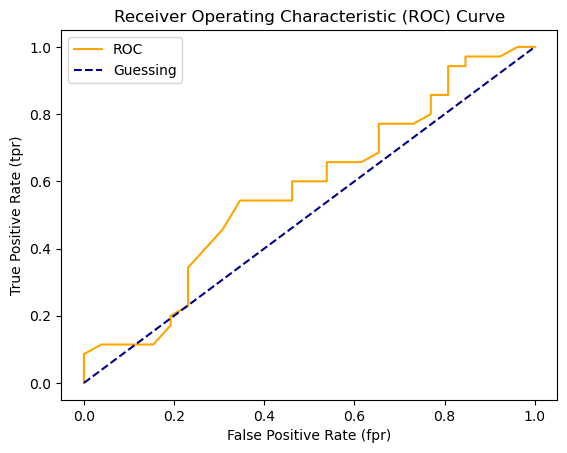

In [91]:
# create a function for plotting roc curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr , tpr):
    
     #plot roc curve
     plt.plot(fpr , tpr, color="orange", label="ROC")
    
     #plot line with no predictive power (baseline)
     plt.plot([0,1],[0,1],color="darkblue",linestyle="--", label="Guessing")
    
     #customize the plot
     plt.xlabel("False Positive Rate (fpr)")
     plt.ylabel("True Positive Rate (tpr)")
     plt.title("Receiver Operating Characteristic (ROC) Curve")
     plt.legend()
     plt.show()

plot_roc_curve(fpr,tpr)
               

    


In [92]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.5758241758241759

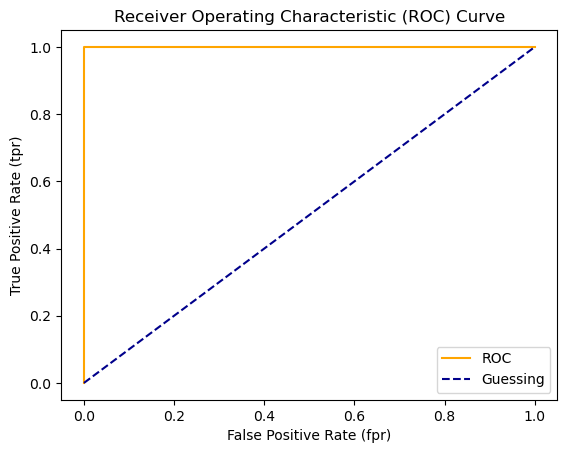

In [93]:
# plot perfect ROC curve and AUC score
fpr, tpr, threshold = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [94]:
roc_auc_score(y_test,y_test)

1.0

In [95]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[10, 16],
       [12, 23]])

In [96]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,10,16
1,12,23


In [97]:
24 + 5 + 3 + 29

61

In [98]:
len(y_preds)

61

In [99]:
#notebookun icinden modul yukleme
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



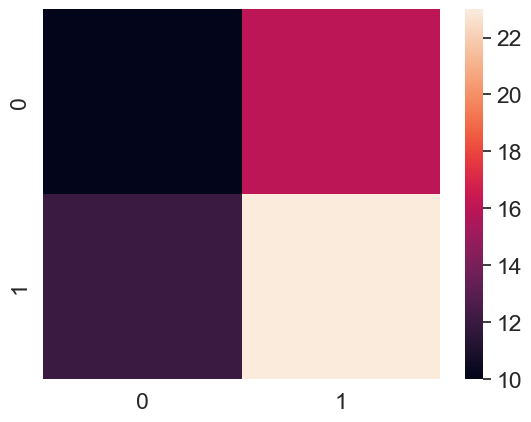

In [100]:
# Make our confusion matrix more visual woth seaborns heatmap()
import seaborn as sns

#set the font scale 
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

#plot it using heatmap()
sns.heatmap(conf_mat);

In [101]:
import sklearn
sklearn.__version__

'1.5.2'

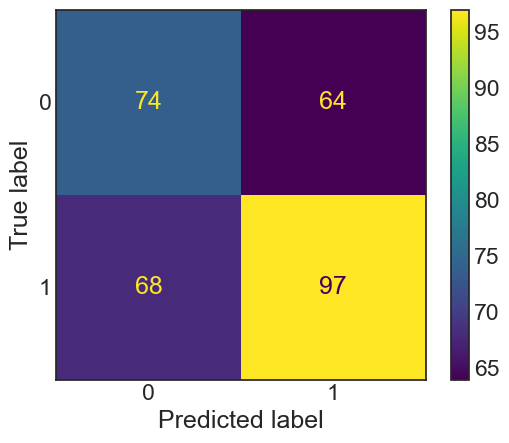

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.style.use('seaborn-v0_8-white')
ConfusionMatrixDisplay.from_estimator(estimator = clf, X=x,y=y);

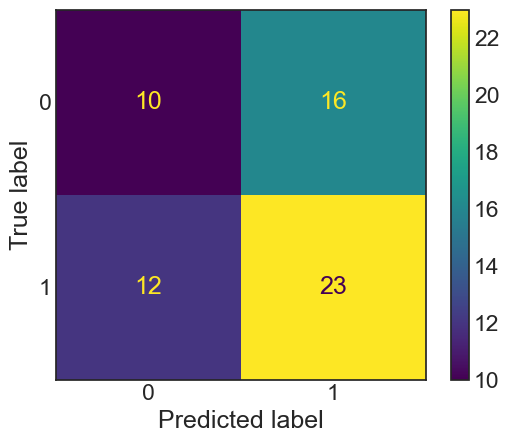

In [103]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds);

In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.45      0.38      0.42        26
           1       0.59      0.66      0.62        35

    accuracy                           0.54        61
   macro avg       0.52      0.52      0.52        61
weighted avg       0.53      0.54      0.53        61



In [105]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [106]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

RandomForestRegressor()

In [107]:
model.score(x_test,y_test)

0.8059809073051385

In [108]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [109]:
y_test


20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [110]:
y_test.mean()

2.0550030959302323

In [111]:
from sklearn.metrics import r2_score

#Fill an array with y_mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [112]:
r2_score(y_test,y_test_mean)

0.0

In [113]:
r2_score(y_test,y_test)

1.0

In [114]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)

mae = mean_absolute_error(y_test,y_preds) # hata payi + -
mae

0.3270458119670544

In [115]:
df = pd.DataFrame(data={"actual values":y_test,
                        "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"] 

In [116]:
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [117]:
np.abs(df["differences"]).mean() #mae

0.3270458119670544

In [118]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_preds)
mse

0.2542443610174998

In [119]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [120]:
squared = np.square(df["differences"])
squared.mean()

0.2542443610174998

In [121]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

df_large_error.head()

/var/folders/gh/lbkqtpb11q79fy7cxd2_8b0r0000gn/T/ipykernel_49788/375720686.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [122]:
# calculate mse with large error
df_large_error["squared_differences"].mean()

0.25812028533523235

In [123]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.225000,-0.408000,0.166464
16623,2.66800,1.972540,-0.695460,0.483665
18086,5.00001,4.853989,-0.146021,0.021322
2144,0.72300,0.714910,-0.008090,0.000065


In [124]:
df_large_error["squared_differences"].mean()

0.7342642968470183

<img src="IMG_1909.png"/>

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)


RandomForestClassifier()

In [126]:
np.random.seed(42)

#cross-validation accuracy
cv_acc = cross_val_score(clf,x,y,cv = 5,scoring = None) # if scoring = None estimators default scoring metric is used
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [127]:
# cross-validated accuracy
print(f"the cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

the cross-validated accuracy is: 82.48%


In [128]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,x,y,scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [129]:
print(f"the cross-validated precision is: {np.mean(cv_precision)*100:.2f}%")

the cross-validated precision is: 83.30%


In [130]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf,x,y,scoring = "recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [131]:
print(f"the cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

the cross-validated recall is: 85.45%


In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

RandomForestRegressor()

In [133]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,)
cv_r2

array([0.51648146, 0.70255896, 0.74089371, 0.61492293, 0.68335489])

In [134]:
print(f"the cross validated R^2 is: {np.mean(cv_r2)}")

the cross validated R^2 is: 0.6516423891480653


In [135]:
np.random.seed(42)
cv_mae = cross_val_score(model,x,y,scoring ="neg_mean_absolute_error")
cv_mae # API in duzgun calismasi icin degerler negatif donuyor, scoring parametrelerinde her zaman yuksek sayi daha iyi

array([-0.54285333, -0.40959054, -0.43864903, -0.47086788, -0.47248027])

In [136]:
print(f"the cross validated mean absolute error is: {np.mean(cv_mae)}")

the cross validated mean absolute error is: -0.4668882098013567


In [137]:
np.random.seed(42)
cv_mse = cross_val_score(model,x,y,scoring ="neg_mean_squared_error")
cv_mse # API in duzgun calismasi icin degerler negatif donuyor, scoring parametrelerinde her zaman yuksek sayi daha iyi

array([-0.51943056, -0.34817352, -0.37273233, -0.45176641, -0.46140212])

In [138]:
print(f"the cross validated mean squared error is: {np.mean(cv_mse)}")

the cross validated mean squared error is: -0.43070098725942013


In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)

y_preds = clf.predict(x_test)

acc = accuracy_score(y_test,y_preds)

prec = precision_score(y_test,y_preds)

rec = recall_score(y_test,y_preds)

f1 = f1_score(y_test,y_preds)

print(f"Accuracy of the model is {acc*100:.2f}%")
print(f"Precision of the model is {prec}")
print(f"Recall of the model is {rec}")  
print(f"F1 of the model is {f1}")

Accuracy of the model is 85.25%
Precision of the model is 0.8484848484848485
Recall of the model is 0.875
F1 of the model is 0.8615384615384616


In [140]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

y_preds = model.predict(x_test)

r2 = r2_score(y_test,y_preds)

mae = mean_absolute_error(y_test,y_preds)

mse = mean_squared_error(y_test,y_preds)

print(f"R^2 of the model is {r2}")
print(f"Mean absolute error of the model is {mae}")  
print(f"Mean squared error of the model is {mse}")

R^2 of the model is 0.8059809073051385
Mean absolute error of the model is 0.3270458119670544
Mean squared error of the model is 0.2542443610174998


In [141]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [142]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [143]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [144]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels.
    on a classification model.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                   "precision": round(precision,2),
                   "recall": round(recall,2),
                   "f1": round(f1,2)}
    print(f"Acc: {accuracy * 100:2f}%")
    print(f"Precision: {precision:2f}")
    print(f"Recall: {recall:2f}")
    print(f"F1 Score: {f1:2f}")
    
    return metric_dict
    

In [145]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x and y
x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

x_train , y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test , y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Make baseline predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)


Acc: 82.222222%
Precision: 0.814815
Recall: 0.880000
F1 Score: 0.846154


In [146]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train,y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier
clf2_metrics = evaluate_preds( y_valid,y_preds_2)

Acc: 80.000000%
Precision: 0.833333
Recall: 0.800000
F1 Score: 0.816327


In [147]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200,],
        "max_depth":[None, 5, 10, 20, 30],
        "max_features":["auto", "sqrt"],
        "min_samples_split":[2, 4, 6],
        "min_samples_leaf":[1, 2, 4]}

np.random.seed(42)

# Split into x & y
x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 666, in _val

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [148]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [149]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions

rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 81.967213%
Precision: 0.774194
Recall: 0.857143
F1 Score: 0.813559


In [150]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [151]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [152]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)


# Split into x & y
x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ekin/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 666, in _val

In [153]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [154]:
gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 81.967213%
Precision: 0.774194
Recall: 0.857143
F1 Score: 0.813559


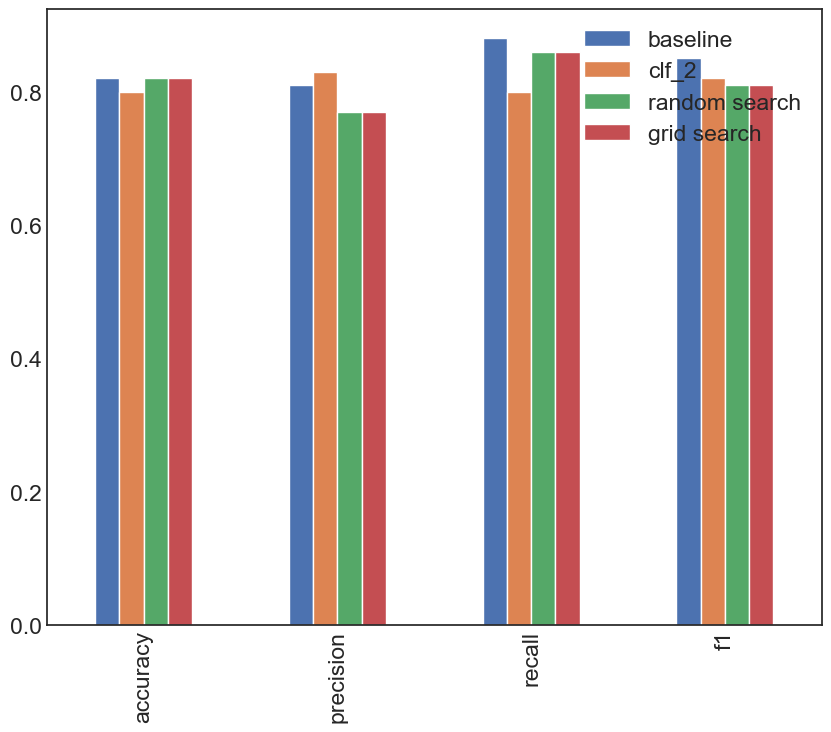

In [155]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

In [156]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open("gs_random_random_forest_model1.pk1","wb"))

In [157]:
#Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model1.pk1","rb"))

In [158]:
# Make some predictions

pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.967213%
Precision: 0.774194
Recall: 0.857143
F1 Score: 0.813559


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [159]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename = "gs_random_forest_model1.joblib")

['gs_random_forest_model1.joblib']

In [160]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model1.joblib")

In [161]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 81.967213%
Precision: 0.774194
Recall: 0.857143
F1 Score: 0.813559


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [162]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [163]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [164]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [169]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"], inplace = True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())
                       ])

# Split data
x = data.drop("Price",axis = 1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

In [171]:
# Use GridSearchCV with our regression pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": [None],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [None],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [172]:
gs_model.score(x_test, y_test)

0.3339554263158365